In [1]:
import pandas as pd
import numpy as np

pd.set_option('max_rows', 5)

recipes = pd.read_csv("epi_r.csv")
print(recipes.shape[0])
recipes.head()

20052


,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# filter recipes with more than 10 000 calories
recipes = recipes[recipes['calories'] < 10000]

# drop rows with NaN
recipes = recipes[recipes['calories'].notna()]
recipes = recipes[recipes['dessert'].notna()]

print(recipes.shape[0])

15914


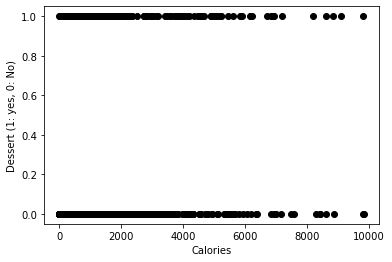

In [3]:
import matplotlib.pyplot as plt

x=recipes['calories']
y=recipes['dessert']

plt.scatter(x=recipes['calories'], y=recipes['dessert'], c ="black")
plt.ylabel("Dessert (1: yes, 0: No)")
plt.xlabel("Calories")
plt.show()
plt.close()

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')

X = x.values.reshape(-1,1)
model.fit(X, y)

LogisticRegression(multi_class='ovr')

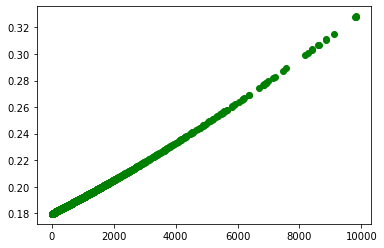

In [15]:
# Alternative using sklearn
plt.scatter(x,model.predict_proba(X)[:,1], c="green")
plt.show()
plt.close()

Optimization terminated successfully.
         Current function value: 0.578946
         Iterations 6


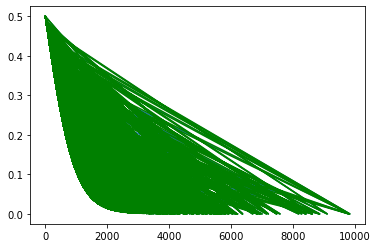

In [16]:
# Alternative using statsmodels
import statsmodels.api as sm

model = sm.Logit(y, X).fit()
proba = model.predict(X) # predicted probability

# estimate confidence interval for predicted probabilities
cov = model.cov_params()
gradient = (proba * (1 - proba) * X.T).T # matrix of gradients for each observation
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])
c = 1.96 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, proba + std_errors * c))
lower = np.maximum(0, np.minimum(1, proba - std_errors * c))

plt.plot(x, proba)
plt.plot(x, lower, color='g')
plt.plot(x, upper, color='g')
plt.show()

<AxesSubplot:xlabel='calories', ylabel='dessert'>

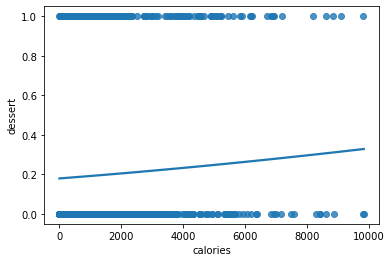

In [7]:
# Alternative using seaborn
import seaborn as sns

sns.regplot(x=x, y=y, data=recipes, logistic=True, ci=None)